<a href="https://colab.research.google.com/github/JohanSH7/Estructuras-de-Datos-Examen-Final/blob/main/Punto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ÁRBOLES COMO HUFFMAN PARA LA COMPRESIÓN EFICIENTE DE DATOS**


## **Contexto:**
La compresión de datos es el proceso de reducir el tamaño de un archivo o conjunto de datos para ocupar menos espacio de almacenamiento o transmitir más eficientemente a través de una red. Una de las técnicas de compresión más eficientes es la codificación de Huffman, que se basa en la frecuencia de aparición de los símbolos en los datos.

Fue propuesta por David A. Huffman en 1952 y es un método de compresión sin pérdida, lo que significa que la información original se puede recuperar completamente después de la descompresión. La idea básica detrás de la codificación de Huffman es asignar códigos de longitud variable a los símbolos en función de su frecuencia de aparición. Los símbolos más frecuentes se representan con códigos más cortos, mientras que los menos frecuentes se representan con códigos más largos.

## **Implementacion:**

El algoritmo de Huffman se implementa mediante la construcción de un árbol de Huffman, que es un árbol binario completo. Aquí hay una descripción paso a paso del proceso:

* *Calcular la frecuencia de cada símbolo:* Se analiza el conjunto de datos y se cuenta la frecuencia de cada símbolo.
* *Crear nodos para cada símbolo:* Se crean nodos individuales para cada símbolo, y cada nodo contiene la frecuencia del símbolo.
* *Crear un bosque de nodos:* Los nodos se colocan en un "bosque" (un conjunto no conectado de nodos) y se ordenan en función de sus frecuencias.
* *Construir el árbol de Huffman:* Se toman los dos nodos con las frecuencias más bajas, se combinan en un nuevo nodo cuya frecuencia es la suma de las frecuencias originales, y este nuevo nodo se inserta en el bosque. Este proceso se repite hasta que solo queda un nodo en el bosque, que es la raíz del árbol de Huffman.
* *Asignar códigos:* Se asignan códigos binarios a cada símbolo siguiendo las ramas del árbol. Los códigos se asignan de manera que no haya ningún código que sea prefijo de otro código (propiedad de prefijo libre).

Después de la construcción del árbol de Huffman, los códigos asignados a cada símbolo se utilizan para comprimir y descomprimir los datos.

La compresión de Huffman es especialmente eficiente para conjuntos de datos donde algunos símbolos son mucho más probables que otros. En esos casos, los códigos cortos se asignan a los símbolos más probables, lo que lleva a una representación más compacta de los datos.

## **JUSTIFICACIÓN:**

1. Generar un conjunto de datos y calcular la frecuencia de cada elemento:

In [100]:
import random
from collections import Counter

# Crear un conjunto de datos con al menos 200 elementos (caracteres)
alfabeto = 'abcdefghijklmnopqrstuvwxyz'
conjunto_datos = random.choices(alfabeto, k=200)

# Calcular las frecuencias de cada elemento
frecuencias = Counter(conjunto_datos)

print(frecuencias)

Counter({'t': 15, 's': 11, 'c': 10, 'f': 10, 'w': 9, 'm': 9, 'q': 9, 'a': 9, 'g': 8, 'p': 8, 'd': 8, 'j': 8, 'l': 7, 'y': 7, 'n': 7, 'r': 7, 'v': 7, 'o': 7, 'h': 7, 'i': 7, 'k': 7, 'u': 6, 'e': 5, 'z': 5, 'b': 4, 'x': 3})


Este código generará un conjunto de datos con 200 caracteres aleatorios del alfabeto y calculará las frecuencias de cada elemento.

2. Implementar el algoritmo de Huffman y la construccion visual del arbol:

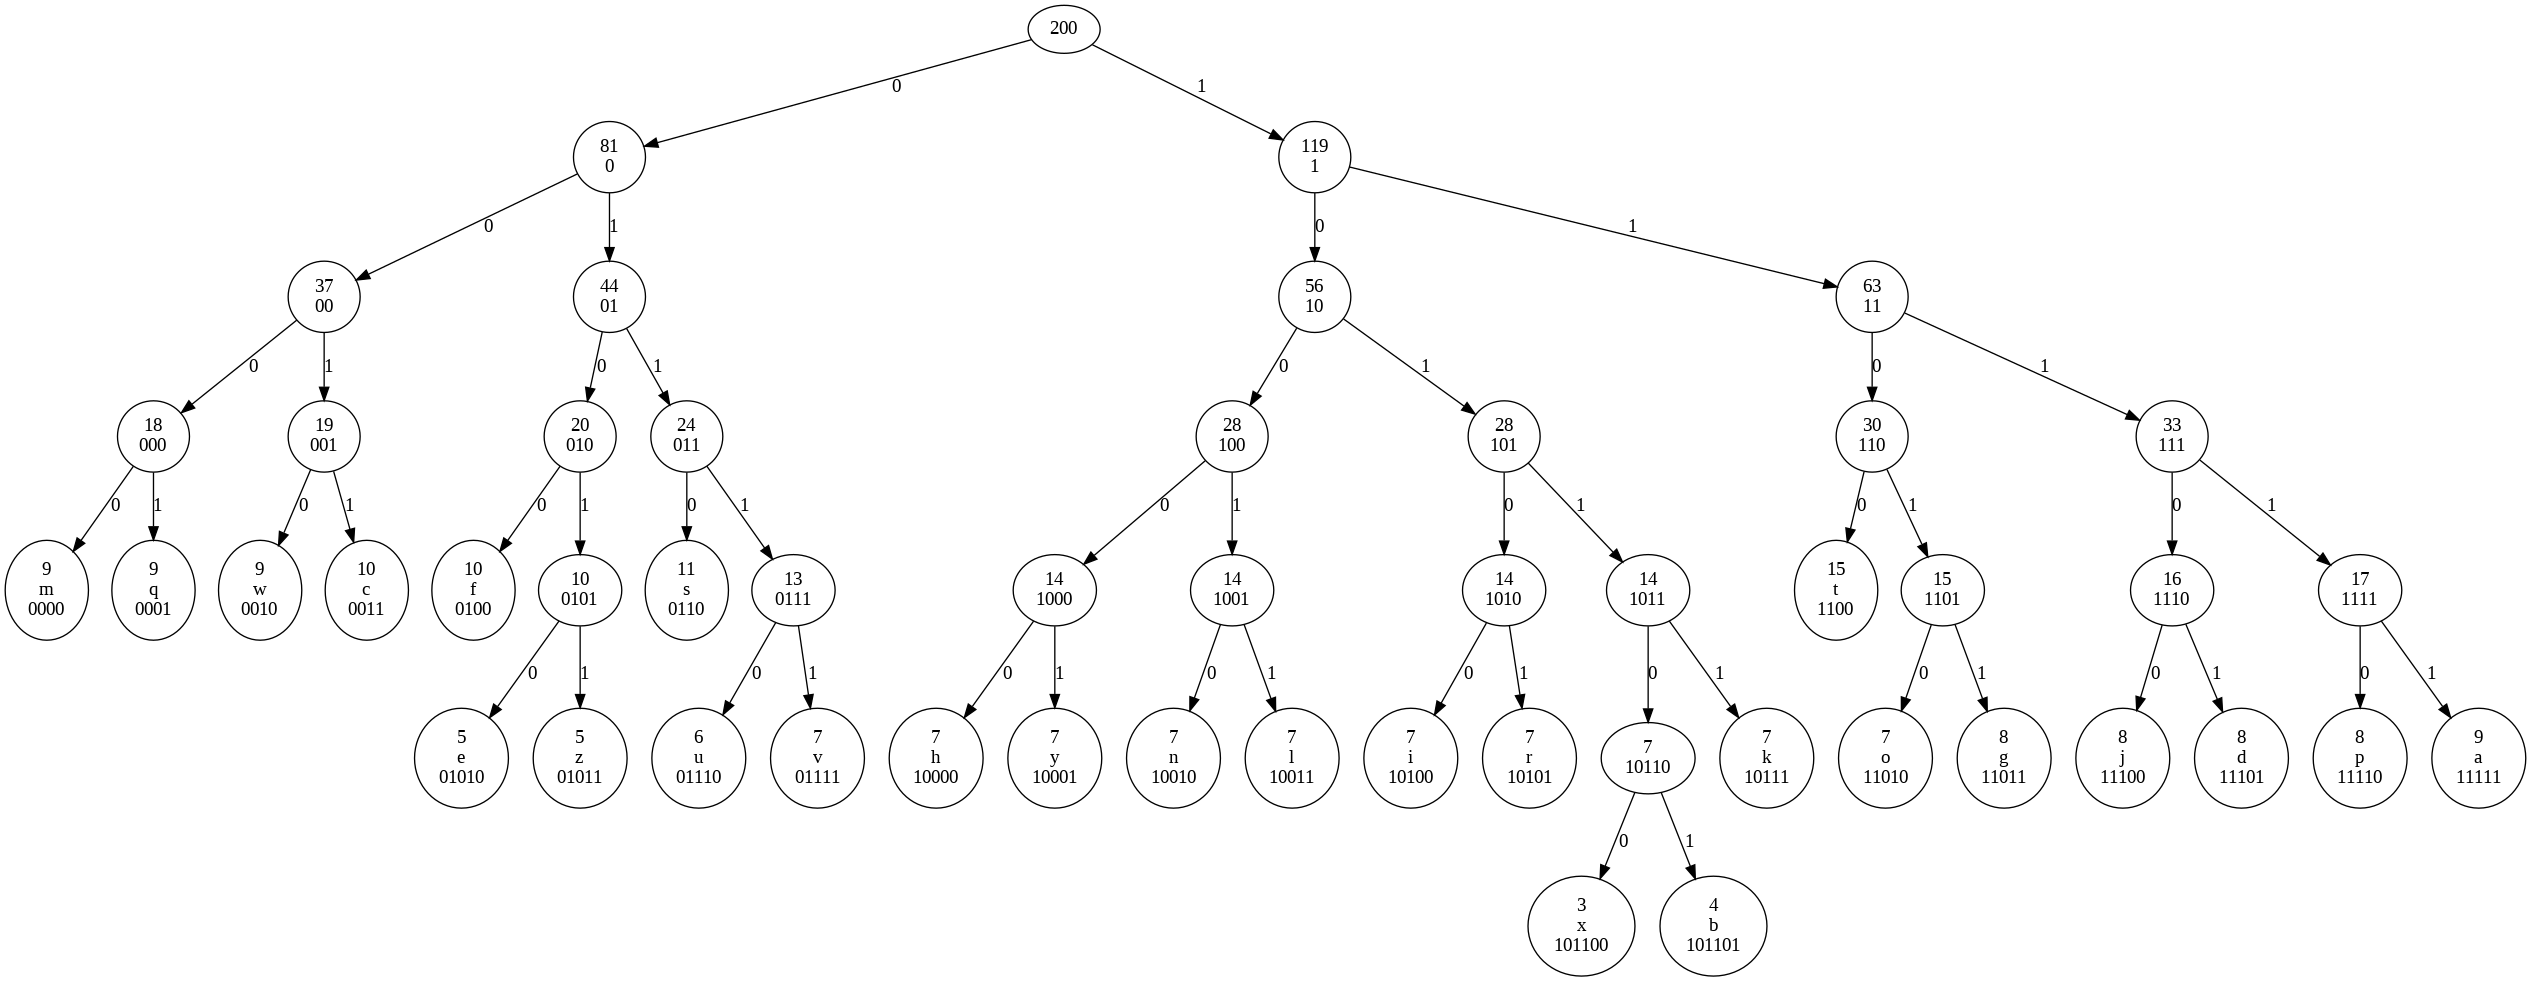

In [101]:
import heapq
import graphviz
from IPython.display import Image


class HuffmanNode:
    def __init__(self, freq, data=None):
        self.freq = freq
        self.data = data
        self.left = None
        self.right = None

    # Hacer que los nodos sean comparables para que heapify funcione
    def __lt__(self, other):
        return self.freq < other.freq

# Función para construir el árbol de Huffman
def build_huffman_tree(data):
    frequencies = [HuffmanNode(freq, char) for char, freq in data]
    heapq.heapify(frequencies)

    while len(frequencies) > 1:
        node1 = heapq.heappop(frequencies)
        node2 = heapq.heappop(frequencies)

        new_freq = node1.freq + node2.freq
        new_node = HuffmanNode(new_freq)
        new_node.left, new_node.right = node1, node2

        heapq.heappush(frequencies, new_node)

    return frequencies[0]

# Función para visualizar el árbol de Huffman
def visualize_huffman_tree(node, graph=None, current_code=""):
    if graph is None:
        graph = graphviz.Digraph(format='png')

    if node:
        label = f"{node.freq}\n{node.data}\n{current_code}" if node.data else f"{node.freq}\n{current_code}"
        graph.node(str(id(node)), label=label)

        if node.left:
            graph.node(str(id(node.left)), label=str(node.left.freq))
            graph.edge(str(id(node)), str(id(node.left)), label='0')
            visualize_huffman_tree(node.left, graph, current_code + '0')

        if node.right:
            graph.node(str(id(node.right)), label=str(node.right.freq))
            graph.edge(str(id(node)), str(id(node.right)), label='1')
            visualize_huffman_tree(node.right, graph, current_code + '1')

    return graph

# Construir el árbol de Huffman
huffman_tree = build_huffman_tree(list(frecuencias.items()))

# Visualizar el árbol de Huffman
graph = visualize_huffman_tree(huffman_tree)
graph.render('huffman_tree', format="png", view=True)

Image("huffman_tree.png")

3. Metodos para asignar códigos y comprimir los datos por codificacion y volver a decodificarlos:

Después de construir el árbol de Huffman, asignamos códigos binarios a cada elemento y utilizamos esos códigos para comprimir el conjunto de datos.

In [102]:
import sys
def generate_huffman_codes(node, current_code="", huffman_codes=None):
    if huffman_codes is None:
        huffman_codes = {}

    if node:
        if node.data:
            huffman_codes[node.data] = current_code
        generate_huffman_codes(node.left, current_code + '0', huffman_codes)
        generate_huffman_codes(node.right, current_code + '1', huffman_codes)

    return huffman_codes

def encode_data(data, huffman_codes):
    encoded_data = []
    for char in data:
        encoded_data.append(huffman_codes[char])
    return ''.join(encoded_data)

def decode_data(encoded_data, huffman_tree):
    decoded_data = ""
    current_node = huffman_tree

    for bit in encoded_data:
        if bit == '0':
            current_node = current_node.left
        elif bit == '1':
            current_node = current_node.right

        if current_node.data:
            decoded_data += current_node.data
            current_node = huffman_tree

    return decoded_data

# Obtener códigos de Huffman
huffman_codes = generate_huffman_codes(huffman_tree)

# Codificar los datos
encoded_data = encode_data(conjunto_datos, huffman_codes)

Visualizamos los el arbol con los valores comprimidos

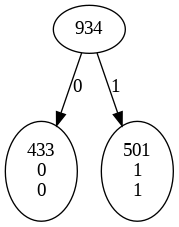

In [103]:
# Construir el árbol de Huffman para los datos comprimidos
compressed_frequencies = Counter(encoded_data)
compressed_huffman_tree = build_huffman_tree(list(compressed_frequencies.items()))

# Visualizar el árbol de Huffman comprimido
compressed_graph = visualize_huffman_tree(compressed_huffman_tree)
compressed_graph.render('compressed_huffman_tree', format="png", view=True)

Image("compressed_huffman_tree.png")

4. Comparar tamaños antes y después de la compresión:

In [104]:
# Comparar tamaños antes y después de la compresión
original_size = len(conjunto_datos) * 8  # Convertir bytes a bits
compressed_size = len(encoded_data)
compression_ratio = (original_size - compressed_size) / original_size

print(f"Tamaño original: {original_size} bits")
print(f"Tamaño comprimido: {compressed_size} bits")
print(f"Porcentaje de compresión: {compression_ratio * 100:.2f}%")

# Descomprimir los datos
decoded_data = decode_data(encoded_data, huffman_tree)

print("Datos originales:", conjunto_datos)
print("Datos descomprimidos:", decoded_data)


Tamaño original: 1600 bits
Tamaño comprimido: 934 bits
Porcentaje de compresión: 41.62%
Datos originales: ['c', 'l', 'e', 'y', 'n', 'b', 'g', 'w', 'l', 'u', 'r', 'z', 'p', 'y', 'x', 'p', 's', 'n', 'v', 'o', 'x', 't', 'm', 'g', 'g', 'q', 't', 'n', 'q', 'h', 'c', 'h', 'h', 'i', 'o', 'd', 'g', 's', 's', 'b', 'k', 'o', 'k', 'f', 'k', 'x', 'p', 's', 'w', 't', 'j', 'a', 'j', 't', 'w', 'y', 'k', 't', 'o', 'p', 'f', 'f', 'l', 'a', 'i', 'r', 'k', 'e', 'm', 'd', 'q', 'a', 'k', 'o', 'a', 'q', 'd', 'm', 'b', 'j', 'f', 'i', 't', 'j', 't', 'v', 'g', 'c', 'a', 'o', 'z', 'j', 'q', 'u', 'q', 't', 'y', 'f', 'a', 'd', 'd', 'r', 'o', 'f', 's', 't', 'e', 'p', 't', 'c', 'v', 'z', 'c', 'a', 'i', 'r', 'y', 'k', 's', 'b', 'r', 'q', 'c', 'u', 'w', 'p', 'd', 'z', 'u', 'j', 'l', 'j', 'n', 'i', 'w', 'v', 'c', 'y', 'q', 'v', 's', 'l', 't', 'z', 'h', 'v', 'n', 'm', 'l', 't', 'g', 'w', 'v', 'c', 'w', 'g', 'm', 'p', 'j', 'a', 'w', 'e', 'f', 'u', 'i', 'w', 's', 'h', 'a', 'y', 'c', 's', 'm', 't', 'r', 'q', 'm', 'u', 'c'

Cuando aplicas la compresión de Huffman, el resultado es un árbol binario donde cada nodo hoja representa un carácter y su código binario correspondiente. Durante el proceso de compresión, los nodos internos del árbol no representan datos específicos, sino que actúan como puntos de bifurcación para dirigir la decodificación.

## **Conclusion**

La elección de la compresión de Huffman puede justificarse por varias razones:

Eficiencia en la Reducción de Tamaño: La compresión de Huffman es especialmente eficaz cuando hay una variación en las frecuencias de los elementos en el conjunto de datos original. En este caso, se observa que hay letras con frecuencias muy diferentes, y Huffman es capaz de asignar códigos más cortos a los elementos más frecuentes y códigos más largos a los menos frecuentes. Esto resulta en una reducción significativa del tamaño del conjunto de datos.

Adaptabilidad a la Distribución de Frecuencias: La compresión de Huffman es adaptable a la distribución específica de frecuencias en el conjunto de datos. Al asignar códigos más cortos a elementos más frecuentes, se aprovecha la redundancia en los datos para lograr una compresión eficiente.

Decodificación Eficiente: La compresión de Huffman es simple de implementar y permite una decodificación eficiente. Los códigos son prefijos, lo que significa que ningún código es prefijo de otro, facilitando la identificación de los límites de cada código durante la decodificación.

Sin Pérdida de Datos: Huffman es un algoritmo de compresión sin pérdida, lo que significa que la información original se puede recuperar completamente durante la decodificación. Esto es crucial en situaciones donde no se puede permitir la pérdida de información, como en la transmisión de datos.

En resumen, la compresión de Huffman es una elección adecuada cuando se trata de datos con variaciones en las frecuencias, y los resultados obtenidos respaldan la eficiencia en la reducción del tamaño del conjunto de datos.